# Trabajando con Pandas

In [1]:
import pandas as pd # import pandas
import numpy as np # import numpy
import matplotlib.pyplot as plt # import libreria para plotear
pd.set_option('max_columns', 50) # maximo de columnas a mostrar cuando se muestra un pandas dataframe
# indica a python que plotee en el notebook
import seaborn as sns
%matplotlib inline

/Users/ivan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Inspeccion

Inspeccion de dataframes. Primero cargamos el fichero.

In [4]:
salarios = pd.read_csv('city-of-chicago-salaries.csv')

_info()_ nos da la siguiente informaicon acerca del dataframe.  
1. Es una variable de tipo DataFrame
2. El numero de filas y el rango del indice (de 0 hasta N-1)
3. El numero de columnas
4. El nombre de las columnas y cuantos nulls hay en cada una
5. El tipo de datos de cada columna (tipo object se refiere principalmente a cadenas)
6. La cantidad de memoria RAM usada por el dataframe

In [12]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32054 entries, 0 to 32053
Data columns (total 4 columns):
Name                      32054 non-null object
Position Title            32054 non-null object
Department                32054 non-null object
Employee Annual Salary    32054 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


Si queremos saber los tipos de datos de las columnas podemos utilizar _dtypes_.

In [13]:
salarios.dtypes

Name                       object
Position Title             object
Department                 object
Employee Annual Salary    float64
dtype: object

Existe un metodo muy interesante que proporciona estadisticas basicas para las columnas numericas. Se llama _describe()_. Permite obtener una vision general muy  rapida del dataframe.

In [16]:
salarios.describe()

,Employee Annual Salary
count,32054.000000
mean,75070.385710
std,23180.297928
min,0.960000
25%,69576.000000
50%,78012.000000
75%,87303.000000
max,260004.000000


Para imprimir las primeras lineas del dataframe se utiliza _head()_ y para las ultimas _tail()_. Por defecto Python imprime 5 lineas. Tambien se le puede pasar el numero de lineas a imprimir a cualquiera de las funciones.

In [17]:
salarios.head() # por defecto 5 lineas

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440


In [18]:
salarios.tail(3) # le digo a tail que imprima las tres ultimas lineas

,Name,Position Title,Department,Employee Annual Salary
32051,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,78012
32052,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,80724
32053,"ZYSKOWSKI, DARIUSZ",CHIEF DATA BASE ANALYST,DoIT,110352


Tambien se puede usar indexacion por trozos _slicing_ como hemos hecho anteriormente con listas y arrays.

In [19]:
salarios[20:22]

,Name,Position Title,Department,Employee Annual Salary
20,"ABDULLAH, LAKENYA N",CROSSING GUARD,POLICE,16286.4
21,"ABDULLAH, RASHAD J",ELECTRICAL MECHANIC-AUTO-POLICE MTR MNT,GENERAL SERVICES,89440.0


### Seleccion

Un dataframe no es mas que un conjunto de objetos _Series_ que comparten un indice. La seleccion de una columna en el dataframe devuelve como resultado una variable tipo _Series_.

In [20]:
salarios['Position Title'].head()

0            WATER RATE TAKER
1              POLICE OFFICER
2    CHIEF CONTRACT EXPEDITER
3           CIVIL ENGINEER IV
4         ELECTRICAL MECHANIC
Name: Position Title, dtype: object

Para indexar mas de una columna hay que pasar una lista con el nombre de las columnas al dataframe. La salida sera un dataframe.

In [23]:
print(salarios[['Name', 'Position Title']].head())
print('\n')

# se puede almacenar en una variable y usar despues
columns_you_want = ['Position Title', 'Department'] 
print(salarios[columns_you_want].head())

                    Name            Position Title
0        AARON,  ELVIA J          WATER RATE TAKER
1      AARON,  JEFFERY M            POLICE OFFICER
2    AARON,  KIMBERLEI R  CHIEF CONTRACT EXPEDITER
3    ABAD JR,  VICENTE M         CIVIL ENGINEER IV
4  ABBATACOLA,  ROBERT J       ELECTRICAL MECHANIC


             Position Title        Department
0          WATER RATE TAKER       WATER MGMNT
1            POLICE OFFICER            POLICE
2  CHIEF CONTRACT EXPEDITER  GENERAL SERVICES
3         CIVIL ENGINEER IV       WATER MGMNT
4       ELECTRICAL MECHANIC          AVIATION


La seleccion de filas se hace de diferentes formas. Se puede hacer una seleccion por indice individual pero lo mas comun es realizar un indexado booleano.

In [29]:
# usuarios que ganan mas de 30000
print(salarios[salarios['Employee Annual Salary'] > 30000].head(3))
print('\n')

# usuarios que ganan mas de 50000 y son policias
print(salarios[(salarios['Employee Annual Salary'] > 50000) & (salarios.Department=='POLICE')].head(3))
print('\n')

# usuarios 
print(salarios[(salarios.Department == 'WATER MGMNT') | (salarios.Department == 'POLICE')].head(3))
print(salarios[(salarios.Department.isin(['WATER MGMNT', 'POLICE']))].head(3)) #Tambien se puede hacer un OR con isin

                  Name            Position Title        Department  \
0      AARON,  ELVIA J          WATER RATE TAKER       WATER MGMNT   
1    AARON,  JEFFERY M            POLICE OFFICER            POLICE   
2  AARON,  KIMBERLEI R  CHIEF CONTRACT EXPEDITER  GENERAL SERVICES   

   Employee Annual Salary  
0                   85512  
1                   75372  
2                   80916  


                     Name  Position Title Department  Employee Annual Salary
1       AARON,  JEFFERY M  POLICE OFFICER     POLICE                   75372
6        ABBATE,  TERRY M  POLICE OFFICER     POLICE                   80724
11  ABDELHADI,  ABDALMAHD  POLICE OFFICER     POLICE                   75372


                  Name     Position Title   Department  Employee Annual Salary
0      AARON,  ELVIA J   WATER RATE TAKER  WATER MGMNT                   85512
1    AARON,  JEFFERY M     POLICE OFFICER       POLICE                   75372
3  ABAD JR,  VICENTE M  CIVIL ENGINEER IV  WATER MGMNT    

Se puede cambiar el indice y poner uno mas significativo. Por ejemplo el nombre de la persona.

In [33]:
print(salarios.set_index('Name').head(2))
print('\n')

print(salarios.head(2))
print("\n^^^ No he cambiado el DataFrame. ^^^\n")

with_new_index = salarios.set_index('Name')
print(with_new_index.head(2))
print("\n^^^ set_index devuelve un nuevo DataFrame. ^^^\n")


                     Position Title   Department  Employee Annual Salary
Name                                                                    
AARON,  ELVIA J    WATER RATE TAKER  WATER MGMNT                   85512
AARON,  JEFFERY M    POLICE OFFICER       POLICE                   75372


                Name    Position Title   Department  Employee Annual Salary
0    AARON,  ELVIA J  WATER RATE TAKER  WATER MGMNT                   85512
1  AARON,  JEFFERY M    POLICE OFFICER       POLICE                   75372

^^^ No he cambiado el DataFrame. ^^^

                     Position Title   Department  Employee Annual Salary
Name                                                                    
AARON,  ELVIA J    WATER RATE TAKER  WATER MGMNT                   85512
AARON,  JEFFERY M    POLICE OFFICER       POLICE                   75372

^^^ set_index devuelve un nuevo DataFrame. ^^^



Si quieres modificar el DataFrame existente debes utilizar el parametro _inplace_. La mayoria de metodos retornan un nuevo DataFrame 

In [35]:
salarios.set_index('Name', inplace=True)
salarios.head()

,Position Title,Department,Employee Annual Salary
Name,,,
"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512
"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372
"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916
"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648
"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440


Podras notar que hemos perdido el indice que Pandas nos da por defecto. Puedes seleccionar todavia usando el metodo _iloc_.

In [37]:
print(salarios.iloc[10])
print('\n')
print(salarios.iloc[[10, 20, 30]])

Position Title            POLICE OFFICER
Department                        POLICE
Employee Annual Salary             43104
Name: ABDALLAH,  ZAID, dtype: object


                      Position Title Department  Employee Annual Salary
Name                                                                   
ABDALLAH,  ZAID       POLICE OFFICER     POLICE                 43104.0
ABDULLAH,  LAKENYA N  CROSSING GUARD     POLICE                 16286.4
ABRAMS,  HENRY L      POLICE OFFICER     POLICE                 86130.0


Y se pueden seleccionar filas a traves del indice con el metodo _loc_.

In [51]:
print(salarios.loc['AARON,  ELVIA J'])
print('\n')
print(salarios.loc[['AARON,  ELVIA J', 'ABRAMS,  HENRY L']])

Position Title            WATER RATE TAKER
Department                     WATER MGMNT
Employee Annual Salary               85512
Name: AARON,  ELVIA J, dtype: object


                    Position Title   Department  Employee Annual Salary
Name                                                                   
AARON,  ELVIA J   WATER RATE TAKER  WATER MGMNT                   85512
ABRAMS,  HENRY L    POLICE OFFICER       POLICE                   86130


La regla basica en general es:
* Usa _loc_ para indexado con indice
* Usa _iloc_ para para indexado por posicion de fila

Si queremos volver a tener el indice por defecto de Pandas podemos usar _reset\_index_ .

In [53]:
salarios.reset_index(inplace=True)
salarios.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440


### Union

Cuando se hace analisis a menudo hay que mezclar/unir bases de datos o ficheros. Para eso podemos utilizar la sentencia _pandas.merge_ 

In [55]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print(left_frame)
print('\n')
print(right_frame)

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e


   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


**inner_join** realizado por defecto. Se unen las filas cuyo campo key coincide. Aquellas keys que no estan en ambos DataFrames se descartan.

In [56]:
pd.merge(left_frame, right_frame, on='key', how='inner')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


**left_outer_join** guarda todos los de la izquierda mas los que hay en comun con la derecha

In [58]:
pd.merge(left_frame, right_frame, on='key', how='left')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


**right_outer_join** guarda todos los de la derecha mas los que tiene en comun con la izquierda

In [59]:
pd.merge(left_frame, right_frame, on='key', how='right')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


**full_outer_join** guarda todos los valores de ambos lados

In [60]:
pd.merge(left_frame, right_frame, on='key', how='outer')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


En todos los aquellos valores cuyo indice no existen y son agregados en el _join_, se rellenan con _nulls_.

### Concatenacion (Combinacion)

Pandas provee de una funcion para concatenar DataFrames _pandas.concat_ que anexa un DataFrame a otro. Por defecto lo hace verticalmente.

In [61]:
pd.concat([left_frame, right_frame])

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


Tambien se puede hacer horizontalmente utilizando el parametro _axis_ . La concatenacion se puede usar de diversas formas puedes mirar en la documentacion de Pandas para ver mas ejemplos.

In [62]:
pd.concat([left_frame, right_frame], axis=1)

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


### Agrupado (split-apply-combine)

Uno de los grandes poderios de Pandas radica en su sencillez a la hora de dividir, aplicar funciones y combinar de nuevo. Esto se conoce como la metodologia _split-apply-combine_.

In [2]:
headers = ['name', 'title', 'department', 'salary']
chicago = pd.read_csv('city-of-chicago-salaries.csv', 
                      header=0,
                      names=headers)
chicago.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440


El metodo **_groupby_** nos devuelve un DataFrameGroupBy que tiene una variedad de funciones

In [64]:
by_dept = chicago.groupby('department')
by_dept

Por ejemplo llamando a _count_ podemos contar el numero de valores dentro de cada columna que no son _nulls_. Si queremos contar el numero de filas para cada columna podemos usar _size_

In [65]:
print(by_dept.count().head()) # NOT NULL de cada columna
print('\n')
print(by_dept.size().tail()) # total registros totales por cada departamento

                   name  title  salary
department                            
ADMIN HEARNG         42     42      42
ANIMAL CONTRL        61     61      61
AVIATION           1218   1218    1218
BOARD OF ELECTION   110    110     110
BOARD OF ETHICS       9      9       9


department
PUBLIC LIBRARY     926
STREETS & SAN     2070
TRANSPORTN        1168
TREASURER           25
WATER MGMNT       1857
dtype: int64


La suma se realiza con la funcion _sum_ y la media con _mean_ y la mediana con _median_

In [66]:
print(by_dept.sum()[20:25]) # suma total de salarios por departamento
print('\n')
print(by_dept.mean()[20:25]) # salario medio de cada departamento
print('\n')
print(by_dept.median()[20:25]) # mediana del salario de cada departamento

                       salary
department                   
HUMAN RESOURCES     4850928.0
INSPECTOR GEN       4035150.0
IPRA                7006128.0
LAW                31883920.2
LICENSE APPL COMM     65436.0


                         salary
department                     
HUMAN RESOURCES    71337.176471
INSPECTOR GEN      80703.000000
IPRA               82425.035294
LAW                70853.156000
LICENSE APPL COMM  65436.000000


                   salary
department               
HUMAN RESOURCES     68496
INSPECTOR GEN       76116
IPRA                82524
LAW                 66492
LICENSE APPL COMM   65436


Tambien se puede realizar operaciones a nivel individual en cada objeto Series. Por ejemplo, podemos calcular los 5 departmentos con un numero mayor de _titles_ distintos

In [69]:
by_dept.title.nunique().sort_values(ascending=False)[:5]

department
WATER MGMNT    153
TRANSPORTN     150
POLICE         130
AVIATION       125
HEALTH         118
Name: title, dtype: int64

### split-apply-combine

El poder real de _groupby_ reside en el divide/aplica/combina.

Imagina que queremos calcular cual es la persona que mas cobra dentro de cada departamento. Usando _groupby_ podemos definir una funcion que llamaremos _ranker_ que etiquetara cada fila de 1 a N donde N es el numero de empleados de cada departamento. Despues, llamamos a _apply_ para aplicar la funcion a cada grupo (en este caso cada departamento). 

In [5]:
def ranker(df):
    """Asigna una posicion en el rankin a cada empleado segun su salario siendo 1 el mejor pagado.
    Asume que los datos estan ordenadors de forma descendente."""
    df['dept_rank'] = np.arange(len(df)) + 1
    return df

In [28]:
chicago.sort_values('salary', ascending=False, inplace=True)
chicago = chicago.groupby('department').apply(ranker)
#print(chicago[chicago.dept_rank == 1].head(5))
print(chicago[chicago['dept_rank'] < 3].head(5))


                        name                           title      department  \
18039    MC CARTHY,  GARRY F        SUPERINTENDENT OF POLICE          POLICE   
8004          EMANUEL,  RAHM                           MAYOR  MAYOR'S OFFICE   
25588      SANTIAGO,  JOSE A               FIRE COMMISSIONER            FIRE   
27594  STEWART III,  CHARLES  FIRST DEPUTY FIRE COMMISSIONER            FIRE   
31587     WYSINGER,  ALFONZA     FIRST DEPUTY SUPERINTENDENT          POLICE   

       salary  dept_rank  
18039  260004          1  
8004   216210          1  
25588  202728          1  
27594  188316          2  
31587  188316          2  


In [7]:
chicago.head(10)

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440
5,"ABBATEMARCO, JAMES J",FIREFIGHTER,FIRE,78012
6,"ABBATE, TERRY M",POLICE OFFICER,POLICE,80724
7,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,2756
8,"ABBOTT, LYNISE M",CLERK III,POLICE,41784
9,"ABBRUZZESE, WILLIAM J",INVESTIGATOR - IPRA II,IPRA,62832


In [17]:
chicago.sort_values('salary', ascending=False, inplace=True)
chicago.head(50)

,name,title,department,salary
18039,"MC CARTHY, GARRY F",SUPERINTENDENT OF POLICE,POLICE,260004
8004,"EMANUEL, RAHM",MAYOR,MAYOR'S OFFICE,216210
25588,"SANTIAGO, JOSE A",FIRE COMMISSIONER,FIRE,202728
27594,"STEWART III, CHARLES",FIRST DEPUTY FIRE COMMISSIONER,FIRE,188316
31587,"WYSINGER, ALFONZA",FIRST DEPUTY SUPERINTENDENT,POLICE,188316
763,"ANDOLINO, ROSEMARIE S",COMMISSIONER OF AVIATION,AVIATION,186576
19175,"MINIOTIS, CONSTANTINE",SUPERINTENDENT'S CHIEF OF STAFF,POLICE,185004
28955,"TRACY, ROBERT J",CHIEF,POLICE,185004
3733,"CALLAHAN, MICHAEL E",DEPUTY FIRE COMMISSIONER,FIRE,178740
8982,"FORD II, RICHARD C",DEPUTY FIRE COMMISSIONER,FIRE,178740


In [21]:
chicago.groupby(['department','name']).sum()

salary
department   name                            
ADMIN HEARNG ADAM,  ELIZABETH         70380.0
             BREWER,  JAMIE           60600.0
             BRIGHAM,  DEBORAH A      63276.0
             BROWN,  ELOUISE V        63456.0
             BURAGE,  LORRIE A        50280.0
             CASSELLA,  CATHERINE     55212.0
             ERVING,  WILGENIA B      66492.0
             ESPINOSA,  YVONNE        60600.0
             FLOURNOY,  NICOLE A      50280.0
             GAVIN,  MARGARET H       73752.0
             GIBSON,  DARRYL          57828.0
             GLOVER,  RHONDA L        60600.0
             GOGOLA,  DEBORAH G       91980.0
             GREEN,  CAROLYN          63456.0
             GRIFFIN,  ALECHIA L      52740.0
             HEIDT,  SANDRA E         93432.0
             HENNIGAN,  KEVIN G      111996.0
             JACKOWIAK,  PATRICIA    156420.0
             JACKSON,  ALLADDIN D     63456.0
             JACKSON,  LYNN           68580.0
             JONES,  LOIS M           55212.0
             KEE,  LISA M             52740.0
             LA GIGLIO,  PATRICIA M   63456.0
             MC KINNEY,  TERESA M     57828.0
             MC SWAIN,  MICHELE A     91980.0
             MEDINA,  ANA M           69648.0
             NICHOLS,  HELEN M        75240.0
             PARKER,  CHALINE D       55212.0
             RIZZO,  ANTHONY J        91980.0
             RIZZO,  MARGARET A       88812.0
...                                       ...
WATER MGMNT  WURTZ,  DWAINE C         70408.0
             WYATT,  WILLIE R         63772.8
             WYTANIEC,  JEFFREY       62292.0
             YAMEOGO,  MICHELLE M     42244.8
             YARKONY,  AVI            72936.0
             YARMER,  KEITH E         95784.0
             YAU,  THOMAS C           86486.4
             YERSICH,  JEFFREY M      76960.0
             YONUSHATIS,  EDWARD J    76960.0
             YOSHIMURA,  MARUJA       56472.0
             YOUNG,  CLEOTIS          76960.0
             YOUNG,  JOHN A           76960.0
             ZABER,  GREGORY S        93683.2
             ZAGONE,  JOSEPH M        86486.4
             ZAGOTTA,  JOSEPH T       70408.0
             ZAHDAN,  HAZEM           91224.0
             ZAHDAN,  ZIYADEH D       98028.0
             ZECEVICH,  DRAGAN        95680.0
             ZEFRAN,  FRANK J         76960.0
             ZEPEDA,  CARLOS          76960.0
             ZEPEDA,  JOSE R          76960.0
             ZIELINSKI,  THEODORE J   95784.0
             ZIEMANN,  DAVID M        76960.0
             ZIEMANN,  DONALD W       70408.0
             ZINCHUK,  BRIAN C        89003.2
             ZIVAT,  MICHAEL          76960.0
             ZIZUMBO,  DANIEL         70408.0
             ZOTTA,  SANDINO          99648.0
             ZUNO,  ERIK              46176.0
             ZUREK,  HENRY            76960.0

[31974 rows x 1 columns]

# Ejercicios

In [13]:
headers = ['name', 'title', 'department', 'salary']
chicago = pd.read_csv('city-of-chicago-salaries.csv', 
                      header=0,
                      names=headers)

1 - Calcula el salario medio de los habitantes de chicago.

In [29]:
chicago.salary.mean()

75070.38571036198

2 - Calcula cuantos habitantes ganan mas que la media.

In [31]:
chicago[chicago.salary > chicago.salary.mean()].count()

name          21296
title         21296
department    21296
salary        21296
dept_rank     21296
dtype: int64

3 - Cual es el departamento que emplea a mayor numero de personas?

In [34]:
chicago.groupby('department').count().sort_values('name', ascending=False)

,name,title,salary,dept_rank
department,,,,
POLICE,13623,13623,13623,13623
FIRE,4731,4731,4731,4731
STREETS & SAN,2070,2070,2070,2070
WATER MGMNT,1857,1857,1857,1857
OEMC,1292,1292,1292,1292
AVIATION,1218,1218,1218,1218
TRANSPORTN,1168,1168,1168,1168
PUBLIC LIBRARY,926,926,926,926
GENERAL SERVICES,913,913,913,913


4 - Cual es el departamento que tiene un salario medio mayor?

In [40]:
bydep = chicago[['department','salary']].groupby('department').mean().reset_index()

In [56]:
salario = bydep.sort_values('salary', ascending=False).head(1).salary.iloc[0]
print salario

93209.9393939


5 - Averigua cuales son los 5 departamentos con una media de salario mayor.

In [58]:
bydep = chicago[['department','salary']].groupby('department').mean().reset_index()
bydep.sort_values('salary', ascending=False).head(5)

,department,salary
13,DoIT,93209.939394
6,BUILDINGS,90720.081322
16,FIRE,89579.082621
25,MAYOR'S OFFICE,85251.949091
5,BUDGET & MGMT,84767.181818


6 - Cual es el departamento con mas puestos de trabajo distintos?

In [69]:
a = chicago.groupby('department')
a.title.nunique().sort_values(ascending=False)[:1]

department
WATER MGMNT    153
Name: title, dtype: int64

7 - Cual es el trabajo mejor remunerado y en que departamento se realiza? 

In [73]:
chicago[:1]

print 'El trabajo mejor remunerado es el de %s y se realiza en el departamento de %s' % (chicago.title.iloc[0], chicago.department.iloc[0])

El trabajo mejor remunerado es el de SUPERINTENDENT OF POLICE y se realiza en el departamento de POLICE


8 - Averigua cuales son los trabajos de cada departamento que emplean a mayor numero de personas.

In [6]:
bydep = chicago[['department', 'title', 'name']].groupby(
    ['department', 'title']).count()

bydep = bydep.sort_values(['name'], ascending=False).reset_index()

bydep = bydep.groupby('department').apply(ranker)

bydep[bydep.dept_rank==1]

,department,title,name,dept_rank
0,POLICE,POLICE OFFICER,9432,1
1,FIRE,FIREFIGHTER-EMT,1303,1
5,STREETS & SAN,SANITATION LABORER,837,1
7,OEMC,TRAFFIC CONTROL AIDE-HOURLY,523,1
10,WATER MGMNT,CONSTRUCTION LABORER,352,1
19,AVIATION,AVIATION SECURITY OFFICER,186,1
23,TRANSPORTN,CONCRETE LABORER,160,1
24,FAMILY & SUPPORT,FOSTER GRANDPARENT,150,1
29,LAW,ASST CORPORATION COUNSEL,134,1
30,PUBLIC LIBRARY,LIBRARY PAGE,132,1


9 - Cuantas personas que se llamen 'Emma' trabajan en Chicago?

In [141]:
def is_emma(row):
    if 'EMMA ' in row['name']:
        return 1
    return 0
    

In [130]:
'EMMA ' in 'MITTS, EMMA M'

True

In [142]:
chicago['emma'] = chicago.apply(is_emma, axis=1)

In [145]:
chicago[chicago.emma==1]

,name,title,department,salary,dept_rank,emma
19301,"MITTS, EMMA M",ALDERMAN,CITY COUNCIL,114912.96,10,1
12608,"HOLMES, EMMA G",PUBLIC HEALTH NURSE II,HEALTH,96300.00,88,1
24862,"ROSENBERG, EMMA E",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,40368.00,273,1
18477,"MC KINNEY, EMMA J",CROSSING GUARD,POLICE,17877.60,13203,1
10750,"GREEN, EMMA J",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,8580.00,481,1
9188,"FREEMAN, EMMA L",FOSTER GRANDPARENT,FAMILY & SUPPORT,2756.00,583,1
18162,"MCDANIEL, EMMA J",FOSTER GRANDPARENT,FAMILY & SUPPORT,2756.00,705,1


10 - Calcula el intervalo de confianza al 95% de los salarios de la ciudad de Chicago

In [168]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [170]:
(m, low, high) = mean_confidence_interval(chicago.salary)

In [171]:
print m
print low
print high

75070.3857104
74816.6144784
75324.1569424


In [155]:
high_bound = chicago.salary.mean() + (1.96 * chicago.salary.std() 
                                      / chicago.shape[0]**.5)

low_bound = chicago.salary.mean() - (1.96 * chicago.salary.std() 
                                      / chicago.shape[0]**.5)

print chicago.salary.mean()
print low_bound
print high_bound

75070.3857104
74816.6193981
75324.1520226


AttributeError: 'tuple' object has no attribute 'set_xlim'

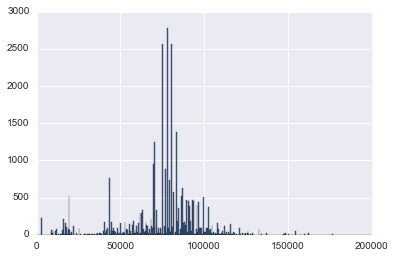

In [7]:
bins = np.arange(0,200000,500)
ax = plt.hist(chicago.salary, bins = bins)
ax.set_xlim(0, 200000)

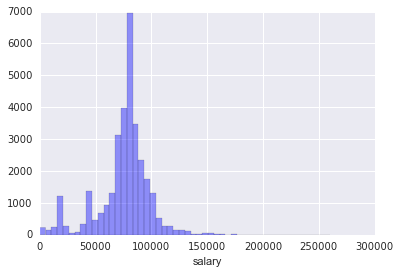

In [167]:
sns.distplot(chicago.salary, kde=False, color="b")

11 - Cual es el departamento con mayor variabiliad de salarios?

In [176]:
def mymax(df):
    return np.max(df)

In [182]:
chicago[['department','salary']].groupby('department').std().sort_values('salary', ascending=False)

,salary
department,
MAYOR'S OFFICE,44797.194237
FAMILY & SUPPORT,34989.941183
LAW,32473.505319
OEMC,28826.686479
CITY COUNCIL,28780.724619
TREASURER,28202.941607
PUBLIC LIBRARY,26631.749878
POLICE BOARD,26389.225074
BOARD OF ETHICS,25784.107508


12 - Subir un 10% el salario a aquellas personas que esten en el top 5 de salarios mas bajos de su departamento

In [55]:
headers = ['name', 'title', 'department', 'salary']
chicago = pd.read_csv('city-of-chicago-salaries.csv', 
                      header=0,
                      names=headers)

In [56]:
#ordenamos por salario
chicago = chicago.sort_values(['department','salary']).reset_index(drop=True)
chicago.head()

,name,title,department,salary
0,"SANTIAGO, NELIDA",ADMINISTRATIVE ASST II,ADMIN HEARNG,48048
1,"BURAGE, LORRIE A",CUSTOMER ACCOUNT REPRESENTATIVE,ADMIN HEARNG,50280
2,"FLOURNOY, NICOLE A",ADMINISTRATIVE ASST II,ADMIN HEARNG,50280
3,"GRIFFIN, ALECHIA L",ADMINISTRATIVE ASST II,ADMIN HEARNG,52740
4,"KEE, LISA M",ADMINISTRATIVE ASST II,ADMIN HEARNG,52740


In [57]:
#recogemos los salarios mas bajos de cada departamento y los metemos en diccionario
my_dict = chicago.groupby('department')['salary'].unique().to_dict()
for key in my_dict.keys():
    chicago.loc[(chicago['department'] == key) & (chicago['salary'].isin(my_dict[key][:5])),'salary'] *= 1.1
chicago.head()

,name,title,department,salary
0,"SANTIAGO, NELIDA",ADMINISTRATIVE ASST II,ADMIN HEARNG,52852.8
1,"BURAGE, LORRIE A",CUSTOMER ACCOUNT REPRESENTATIVE,ADMIN HEARNG,55308.0
2,"FLOURNOY, NICOLE A",ADMINISTRATIVE ASST II,ADMIN HEARNG,55308.0
3,"GRIFFIN, ALECHIA L",ADMINISTRATIVE ASST II,ADMIN HEARNG,58014.0
4,"KEE, LISA M",ADMINISTRATIVE ASST II,ADMIN HEARNG,58014.0


13 - Compara estadisticamente si existen diferencias significativas entre los salarios de los diferentes departamentos. Para ello deberas utilizar una ANOVA de 1 factor independiente.

In [81]:
import scipy.stats as ss

samples = [salary for department, salary in chicago.groupby('department')['salary']]
f_val, p_val = ss.f_oneway(*samples)
print('Name: {}, F value: {:.3f}, p value: {:.3f}'.format('Department Salaries', f_val, p_val))

Name: Department Salaries, F value: 260.506, p value: 0.000


14 - Calcula la media del salario de los departamentos 'POLICE', 'POLICE BOARD' y 'FIRE'

In [58]:
df_small = chicago[chicago['department'].isin(['POLICE', 'POLICE BOARD', 'FIRE'])]

In [64]:
print 'La media de los salarios de los departamentos POLICE, POLICE BOARD y FIRE es: %d$' % df_small['salary'].mean()

La media de los salarios de los departamentos POLICE, POLICE BOARD y FIRE es: 79262$
